In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from pingouin import intraclass_corr

In [ ]:
data = {
    'Relevance_T1': [85,90, 90, 90, 100],
    'Relevance_T2': [85,90, 90, 90, 100],
    'Relevance_T3': [85,90, 90, 90, 100],
    'Fluency_T1': [85,90, 95, 90, 100],
    'Fluency_T2': [85,90, 95, 90, 100],
    'Fluency_T3': [85,90, 95, 90, 100],
    'Clarity_T1': [95,90, 95, 90, 95],
    'Clarity_T2': [95,95, 95, 90, 100],
    'Clarity_T3': [95,95, 95, 90, 100],
    'Professionalism_T1': [90,90, 85, 95, 95],
    'Professionalism_T2': [90,90, 85, 95, 95],
    'Professionalism_T3': [90,90, 90, 95, 95],
    'Structured_Answers_T1': [90,90, 90, 95, 95],
    'Structured_Answers_T2': [80,95, 95, 95, 95],
    'Structured_Answers_T3': [90,90, 95, 95, 95],
    'No_Fillers_T1': [80,90, 85, 90, 90],
    'No_Fillers_T2': [80,90, 80, 95, 95],
    'No_Fillers_T3': [85,95, 80, 95, 95],
    'Focused_T1':  [90,90, 80, 95, 95],
    'Focused_T2':  [90,95, 85, 95, 95],
    'Focused_T3':  [90,95, 85, 95, 95],
    'Authentic_T1':  [90,80, 85, 95, 95],
    'Authentic_T2':  [90,85, 85, 95, 95],
    'Authentic_T3':  [90,85, 85, 95, 95],
    'Overall_Quality_T1': [85,90, 85, 90, 100],
    'Overall_Quality_T2': [85,90, 85, 90, 100],
    'Overall_Quality_T3': [85,90, 90, 90, 100]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
# Calculate Pearson correlation coefficient for each rubric between Time 1 and Time 2
rubrics = ['Relevance', 'Fluency', 'Clarity', 'Professionalism', 'Structured_Answers',
           'No_Fillers', 'Focused', 'Authentic', 'Overall_Quality']

In [ ]:

# Convert the data to a long format suitable for ICC calculation
long_df = df.melt(var_name='Rubric_Evaluator', value_name='Score')
long_df[['Rubric', 'Evaluator']] = long_df['Rubric_Evaluator'].str.split('_T', expand=True)
long_df['Evaluator'] = long_df['Evaluator'].astype(int)

# Calculate ICC
icc_results = intraclass_corr(data=long_df, targets='Rubric', raters='Evaluator', ratings='Score')

# Filter the results for ICC2 (Average measures, consistency)
icc_filtered = icc_results[icc_results['Type'] == 'ICC2']

In [ ]:
icc_filtered

,Type,Description,ICC,F,df1,df2,pval,CI95%
1,ICC2,Single random raters,0.797333,23.425,8,16,1.946642e-07,"[0.4, 0.95]"


In [ ]:
print(icc_filtered.columns)

Index(['Type', 'Description', 'ICC', 'F', 'df1', 'df2', 'pval', 'CI95%'], dtype='object')


In [ ]:
icc_filtered.df2

,df2
1,16


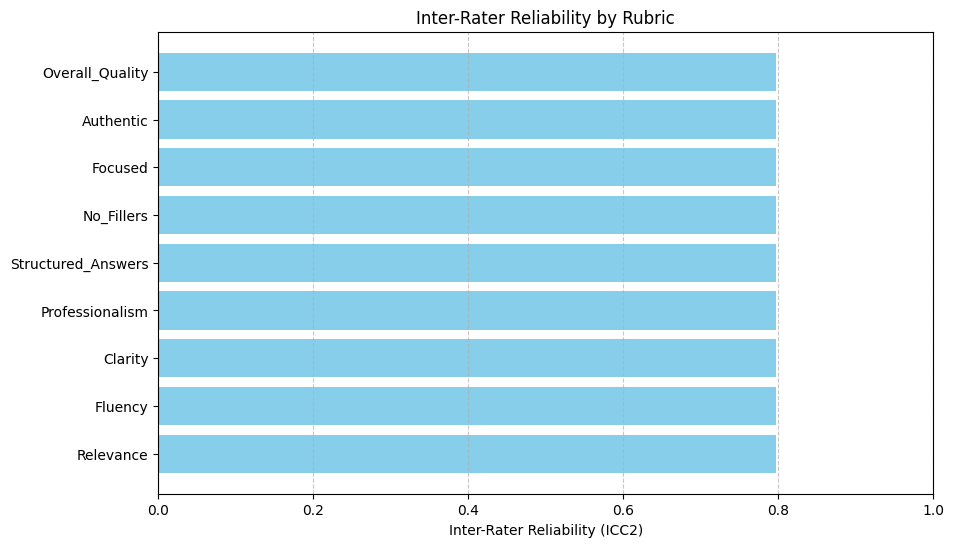

In [ ]:
import matplotlib.pyplot as plt
# Plot the ICC results for each rubric
plt.figure(figsize=(10, 6))
plt.barh(long_df['Rubric'], icc_filtered['ICC'], color='skyblue')
plt.xlabel('Inter-Rater Reliability (ICC2)')
plt.title('Inter-Rater Reliability by Rubric')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the graph
plt.show()